# cylinder model

## 2D example

import all the packages

In [ ]:
import numpy as np

# import sasmodels
import sasmodels
import sasmodels.core
import sasmodels.data
import sasmodels.bumps_model

import sasdata
from sasdata.dataloader.loader import Loader

import bumps
import bumps.fitters
import bumps.names
import bumps.fitproblem


import os
#import periodictable
#import periodictable.nsf
import tol_colors as tc # colorblind safe color palettes


"""
import matplotlib.pyplot and set custom default settings for plots
"""
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.rc('font', size=14) # default fontsize
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('legend', title_fontsize=14)
plt.rc('figure', titlesize=18)
plt.rc("figure", figsize=(5,5))
plt.rc("lines", linewidth=3)


# use colorblind safe colors:
plt.rc('axes', prop_cycle=plt.cycler('color', list(tc.tol_cset('muted'))))
try:
    plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))
except:
    pass
plt.rc('image', cmap='tc_iridescent')

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_31908\725430097.py:29: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


example of checking the version of a package

## TO DO : write here the loading of the 2D image !

### using either adaptation of 1D data code -> sasmodels.data.Data2D() function

data = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2])

filename='./data-exemples/e6_10mM.dat'
data_np = np.loadtxt(filename, skiprows=40)

data = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2])

OR

### 2D data loader built-in function

## 2D dataset fiting

### Here we are using an empty 2D data set to do calculations only.

In order to generate an empty 2D dataset, we need to define the maximum q at the edges and the number of q-values (could think of this as number of pixels along the x and y direction of a square detector):

In [2]:
q_max = 0.2 # limit along edge of detector
num_q = 200 # number of q values along x and y directions, use even number
q = np.linspace(q_max*0.5/(int(num_q/2)-0.5), q_max, int(num_q/2))
q = np.hstack((-1*np.flip(q), q))
data2d = sasmodels.data.empty_data2D(qx=q, qy=q, resolution=0)

At each "pixel" location, the true q-value has qx and qy components, and so the 2D empty dataset is structured with a `qx_data` array and `qy_data` array that is used to calculate the `q_data` array as $q=(qx^2+qy^2)^{\frac{1}{2}}$.

In [3]:
data2d.qx_data[:num_q]

array([-0.2       , -0.19798995, -0.1959799 , -0.19396985, -0.1919598 ,
       -0.18994975, -0.1879397 , -0.18592965, -0.1839196 , -0.18190955,
       -0.1798995 , -0.17788945, -0.1758794 , -0.17386935, -0.1718593 ,
       -0.16984925, -0.1678392 , -0.16582915, -0.1638191 , -0.16180905,
       -0.15979899, -0.15778894, -0.15577889, -0.15376884, -0.15175879,
       -0.14974874, -0.14773869, -0.14572864, -0.14371859, -0.14170854,
       -0.13969849, -0.13768844, -0.13567839, -0.13366834, -0.13165829,
       -0.12964824, -0.12763819, -0.12562814, -0.12361809, -0.12160804,
       -0.11959799, -0.11758794, -0.11557789, -0.11356784, -0.11155779,
       -0.10954774, -0.10753769, -0.10552764, -0.10351759, -0.10150754,
       -0.09949749, -0.09748744, -0.09547739, -0.09346734, -0.09145729,
       -0.08944724, -0.08743719, -0.08542714, -0.08341709, -0.08140704,
       -0.07939698, -0.07738693, -0.07537688, -0.07336683, -0.07135678,
       -0.06934673, -0.06733668, -0.06532663, -0.06331658, -0.06

In [4]:
data2d.qx_data[num_q:num_q*2]

array([-0.2       , -0.19798995, -0.1959799 , -0.19396985, -0.1919598 ,
       -0.18994975, -0.1879397 , -0.18592965, -0.1839196 , -0.18190955,
       -0.1798995 , -0.17788945, -0.1758794 , -0.17386935, -0.1718593 ,
       -0.16984925, -0.1678392 , -0.16582915, -0.1638191 , -0.16180905,
       -0.15979899, -0.15778894, -0.15577889, -0.15376884, -0.15175879,
       -0.14974874, -0.14773869, -0.14572864, -0.14371859, -0.14170854,
       -0.13969849, -0.13768844, -0.13567839, -0.13366834, -0.13165829,
       -0.12964824, -0.12763819, -0.12562814, -0.12361809, -0.12160804,
       -0.11959799, -0.11758794, -0.11557789, -0.11356784, -0.11155779,
       -0.10954774, -0.10753769, -0.10552764, -0.10351759, -0.10150754,
       -0.09949749, -0.09748744, -0.09547739, -0.09346734, -0.09145729,
       -0.08944724, -0.08743719, -0.08542714, -0.08341709, -0.08140704,
       -0.07939698, -0.07738693, -0.07537688, -0.07336683, -0.07135678,
       -0.06934673, -0.06733668, -0.06532663, -0.06331658, -0.06

In [5]:
data2d.qy_data[:num_q]

array([-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0

In [6]:
data2d.qy_data[num_q:num_q*2]

array([-0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19798995,
       -0.19798995, -0.19798995, -0.19798995, -0.19798995, -0.19

## create the model for bump fiting

In [7]:
kernel = sasmodels.core.load_model("cylinder")
params = {} # default parameters for now
model = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data2d, model=model)

parameters with polydispersity for 2D data

In [8]:
kernel.info.parameters.pd_2d

{'length', 'phi', 'radius', 'theta'}

plot the experiment with manually ajusted values for the parameters

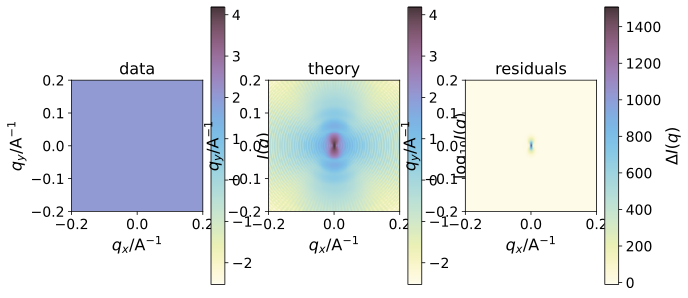

In [9]:
params = {
    "phi": 0, "theta": 90,
    "phi_pd_type": 'gaussian', #polydispersity function
    "phi_pd": 20, #polydispersity
    "phi_pd_n": 60, #number of steps in polydispersity
    "phi_pd_nsigma": 4, #range of polydispersity    
    "radius": 80,
    "radius_pd_type": 'gaussian', #number of steps in polydispersity
    "radius_pd": 0.1, #polydispersity
    "radius_pd_n": 8, #number of steps in polydispersity
    "radius_pd_nsigma": 4, #range of polydispersity
    "length":850,
    "background": 0.000001,
    "scale": 1
}
model = sasmodels.bumps_model.Model(model=kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data2d, model=model)

plt.figure(figsize=(10,5))
experiment.plot()

In [10]:
model.state()

{'scale': 1,
 'background': 1e-06,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 80,
 'radius_pd': 0.1,
 'radius_pd_n': 8,
 'radius_pd_nsigma': 4,
 'length': 850,
 'length_pd': 0.0,
 'length_pd_n': 35.0,
 'length_pd_nsigma': 3.0,
 'theta': 90,
 'theta_pd': 0.0,
 'theta_pd_n': 35.0,
 'theta_pd_nsigma': 3.0,
 'phi': 0,
 'phi_pd': 20,
 'phi_pd_n': 60,
 'phi_pd_nsigma': 4,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian',
 'length_pd_type': 'gaussian',
 'theta_pd_type': 'gaussian',
 'phi_pd_type': 'gaussian'}

* choice of the initial values for parameters
* choice of the fiting parameters with their fiting range

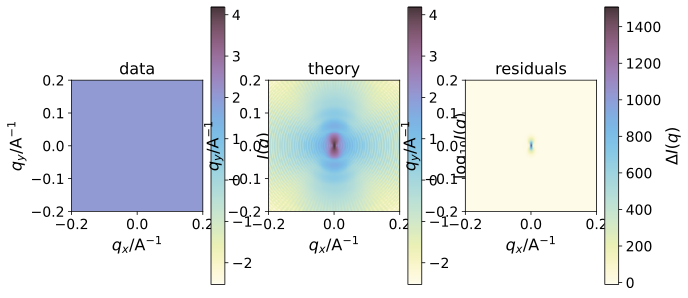

In [11]:
params = {
    "phi": 0, "theta": 90,
    "phi_pd_type": 'gaussian', #polydispersity function
    "phi_pd": 20, #polydispersity
    "phi_pd_n": 60, #number of steps in polydispersity
    "phi_pd_nsigma": 4, #range of polydispersity    
    "radius": 80,
    "radius_pd_type": 'gaussian', #number of steps in polydispersity
    "radius_pd": 0.1, #polydispersity
    "radius_pd_n": 8, #number of steps in polydispersity
    "radius_pd_nsigma": 4, #range of polydispersity
    "length":850,
    "background": 0.000001,
    "scale": 1
}
model = sasmodels.bumps_model.Model(model=kernel, **params)

#list of the fiting parameters with their fiting range
model.radius.range(60, 100)

experiment = sasmodels.bumps_model.Experiment(data=data2d, model=model)

plt.figure(figsize=(10,5))
experiment.plot()

* creation of the fit `problem` 
* `problem` is generated by FitProblem in bump module

In [12]:
problem = bumps.fitproblem.FitProblem(experiment)

* RUN the fit `problem` 

step 1 cost 1000.265324(25)
                                  radius .|........         68 in (60,100)
step 2 cost 1000.265324(25)
step 3 cost 746.905258(25)
step 4 cost 746.905258(25)
step 5 cost 746.905258(25)
step 6 cost 692.097415(25)
step 7 cost 692.097415(25)
step 8 cost 692.097415(25)
step 9 cost 678.900515(25)
step 10 cost 678.900515(25)
step 11 cost 678.900515(25)
step 12 cost 675.632418(25)
step 13 cost 675.632418(25)
step 14 cost 675.632418(25)
step 15 cost 674.817332(25)
step 16 cost 674.817332(25)
step 17 cost 674.817332(25)
step 18 cost 674.613681(25)
step 19 cost 674.613681(25)
step 20 cost 674.613681(25)
step 21 cost 674.562776(25)
                                  radius |.........    60.0005 in (60,100)
step 22 cost 674.562776(25)
step 23 cost 674.562776(25)
step 24 cost 674.550051(25)
step 25 cost 674.550051(25)
step 26 cost 674.550051(25)
step 27 cost 674.546869(25)
step 28 cost 674.546869(25)
step 29 cost 674.546869(25)
step 30 cost 674.546074(25)
step 31 cost 674.

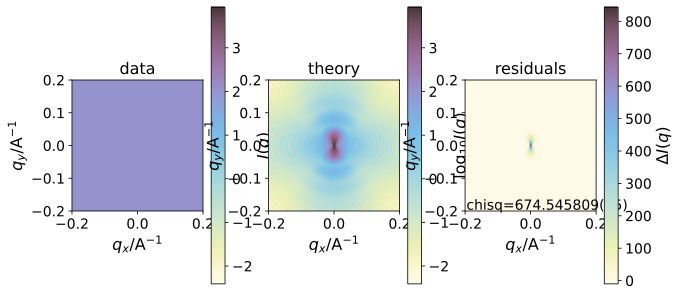

In [13]:
results = bumps.fitters.fit(problem, verbose=True)
plt.figure(figsize=(10, 5))
problem.plot()

read different elements

In [14]:
kernel.info.parameters.iq_parameters

[P<sld>, P<sld_solvent>, P<radius>, P<length>]

In [15]:
kernel.info.name

'cylinder'

In [16]:
kernel.info.category

'shape:cylinder'

parameters with polydispersity for 2D data

In [17]:
kernel.info.parameters.pd_2d

{'length', 'phi', 'radius', 'theta'}

parameters for orientation

In [18]:
kernel.info.parameters.orientation_parameters

[P<theta>, P<phi>]

 ### TO DO: look later at function sasmodels.data.plot_theory()

In [19]:
print(problem.summarize())

                                  radius |.........         60 in (60,100)


In [20]:
results.x

array([60.])

In [21]:
results.dx

array([0.00672138])

In [22]:
problem.labels()

['radius']

In [23]:
problem.fitness.model.state()

{'scale': 1,
 'background': 1e-06,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 60.00000000000001,
 'radius_pd': 0.1,
 'radius_pd_n': 8,
 'radius_pd_nsigma': 4,
 'length': 850,
 'length_pd': 0.0,
 'length_pd_n': 35.0,
 'length_pd_nsigma': 3.0,
 'theta': 90,
 'theta_pd': 0.0,
 'theta_pd_n': 35.0,
 'theta_pd_nsigma': 3.0,
 'phi': 0,
 'phi_pd': 20,
 'phi_pd_n': 60,
 'phi_pd_nsigma': 4,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian',
 'length_pd_type': 'gaussian',
 'theta_pd_type': 'gaussian',
 'phi_pd_type': 'gaussian'}

In [24]:
problem.fitness.theory()

array([0.01479556, 0.0136935 , 0.01580687, ..., 0.01580687, 0.0136935 ,
       0.01479556])

The default optimizer for the bumps fit is the Levenberg-Marquardt method, but there are many available as described in greater detail in the Bumps [documentation](https://bumps.readthedocs.io/en/latest/guide/optimizer.html) with additional fitting options.

For Levenberg-Marquardt, the steps, f(x) tolerance and x tolerance from the GUI options can be set with the `steps`, `ftol` and `xtol` arguments in the `fit` method.

<img src="https://bumps.readthedocs.io/en/latest/_images/fit-lm.png">

*Image source: https://bumps.readthedocs.io/en/latest/guide/optimizer.html*

step 1 cost 1349.091617(25)
                                  radius |.........         60 in (60,100)
final chisq 674.545809(25)
=== Uncertainty from curvature:     name   value(unc.) ===
                                  radius   60.0000(67)    


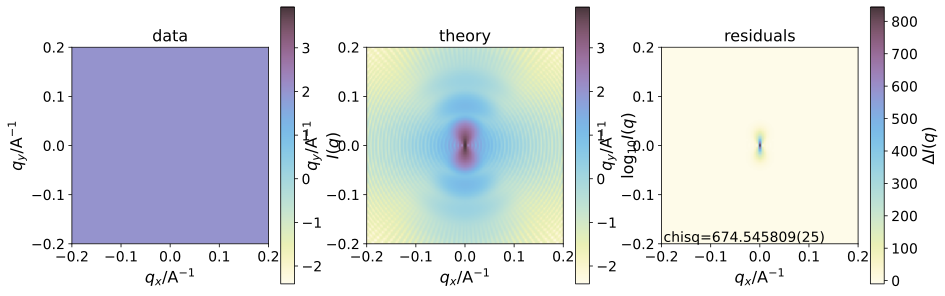

In [25]:
results = bumps.fitters.fit(problem, method='lm', steps=1000, ftol=1.5e-08, xtol=1.5e-08, verbose=True)

plt.figure(figsize=(15,5))
problem.plot()

## Explanation of the polydispersity parameters

The polydispersity is set using a special set of \*\_pd\_\* parameters:
* `*_pd*` is the width of the polydispersity and the exact definition will depend on the type of distribution specified; in this cause of a 'gaussian` distribution, it is defined as as $\frac{\sigma}{x_{mean}}$
* `*_pd_type*` defines the type of polydispersity distribution used
* `*_pd_n` corresponds to the the number of points in the distribution used by the calculation (Npts in the image below)
* `*_pd_nsigma` sets the range of the distribution sampled (Nsigmas in the image below)

For example, radius polydispersity could be defined by specifying **all four** of the pd parameters. With the default values, this would look like:
* `radius_pd = 0`
* `radius_pd_type = 'gaussian'`
* `radius_pd_n = 35`
* `radius_pd_nsigma = 3`

The available polydispersity distributions are defined in the SasView [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html) but we can access them directly through the sasmodels `weights` module.

The 'gaussian' distribution is calculated by:

$$
f(x) = \frac{1}{Norm}\exp\left(-\frac{(x-x_{mean})^2}{2\sigma^2}\right)
$$

<img src=https://www.sasview.org/docs/_images/pd_gaussian.jpg>

*Image source: https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html*
